# <span style='font-family:times new roman'>**Plotting the wavefunctions of the infinite square well with a bump without given energy values.**</span>

### _Introduction:_

Quantum Mechanics \(QM\) has a monumental impact on the way we interpret the phenomena around us. QM mathematically interprets how particles interact with each other on a subatomic scale! It treats the properties of these particles \(position, momentum\) as being given as a wavefunction, $\psi$ \[1:51\-76\].  In 1926, Erwin Schrödinger came up with a very famous equation known as the Schrödinger equation \[2\]. This equation is at the core of quantum mechanics and describes the behavior of a quantum particle. The equation provides the base for calculating energy levels in a given potential with boundary conditions. These energy levels are quantized \(can have only a set of discrete values\) \[1:81–128\]. The equation also provides the basis for the change of the probability density over time, the probability density is simply  $|\psi|^2$ \[1:51\-76\]. The infinite square well is a special case of the Schrödinger equation where a particle is confined to a region of space \[1: 133–189\] and is mostly used to introduce the basic principles of quantum mechanics which in turn can then be applied to more complex systems. The potential is equal to 0 within that space, and outside it is infinite; therefore, the particle can not escape and is confined.

In this report, the fundamental code will be tested for an infinite well with first, a given energy level and then with no given energy level where a plot $\psi$ will be the result. This can be done, thanks to the special nature of this well, that the boundary conditions are easily established \[1:133–189\]. This will then allow us to plot $\psi$ . Once all these works, a new layer of complication will be added, of a bump within the well. This bump will be centered and will have a finite, defined potential inside the well, meaning there will be more boundary conditions. The aim of this report is to obtain a plot of $\psi$  and the probability density with no given energy levels for an infinite well with a bump in the middle.

### _Method:_

Firstly, the infinite well needs to be defined.



In [31]:
import numpy as np

L = 1e-9             #lenght of well
xmin = -L/2          #confined space limits
xmax = L/2
npts = 1000          #number of points
x_eval = np.linspace(xmin,xmax,npts)   #lenght when potential is equal to 0

In the case of this report and as seen above, the potential used will not be a function of time, therefore the Time\-Independent Schrödinger equation \(TISE\) will be used \[2\]. \begin{equation}E\psi = \frac{-\hbar^2}{2m}\frac{d^2\psi}{dx^2} + V\psi\end{equation} Where E is given by the energy levels, m is the mass of the particle, $\hbar$ is planks constant, V is the potential and $\psi$ is the wavefunction. Firstly, TISE is a second order ODE and to be able to plot $\psi$ it will need to be rearranged for the second derivative and solved. Rearranging TISE gives: \begin{equation}\frac{d^2\psi}{dx^2} = -k\psi(E-V)\end{equation}Where k is given by $\frac{2m}{\hbar^2}$, for now V = 0 and thus can be disregarded. E is now given and defined by \[1: 51\-76\]:\begin{equation}E_n = \frac{n^2\pi^2\hbar^2}{2mL^2}\end{equation} Where n = energy state and L is the length of the well. In our case, L was defined above and n is chosen to be 1. Putting equations \(3\) and k  in code gives: 


In [32]:
from scipy.constants import hbar
m = 9.11e-31         #mass of an electron 
n = 1                #given energy state 
En = ((n**2) * (np.pi**2) * (hbar**2)) / (2 * m * (L**2))   #energy level equation,equation (3)
k = 2*m /(hbar**2)   #constants given by k

Now solving the ODE can be done using the code below. Solve\_ivp will be used, this SciPy function only solves a first\-order ODE with given boundary conditions. The $\frac{d^2\psi}{dx^2}$ is simply $\frac{d\psi^\prime}{dx}$where $\psi^\prime$Therefore, using equation \(2\) the function below can be written. This means that solve\_ivp will have a first\-order ODE and thus will be able to work. 


In [33]:
 def derivative(x, sv, E, V=0):
    '''turns a second order ODE of the schordinger equation with a given E value into a first order ODE'''
    psi, dpsi_dx = sv
    d2psi_dx2 = (-k*psi*(E-V))
    return dpsi_dx, d2psi_dx2

Using the derivative function above and solve\_ivp a graph of $\psi$ can be plotted. First, solve\_ivp needs to be given boundary conditions as stated above, which are $\psi$ and $\psi^\prime$ at the boundaries. $\psi$ at the boundary is 0 since the V = $\infty$ and the particle can not escape the well and is confined there. Therefore $\psi^\prime$ has to be a very small number, 1 will be chosen.



Text(0.5, 1.0, 'Fig 1. A graph shopwing ψ for n=1')

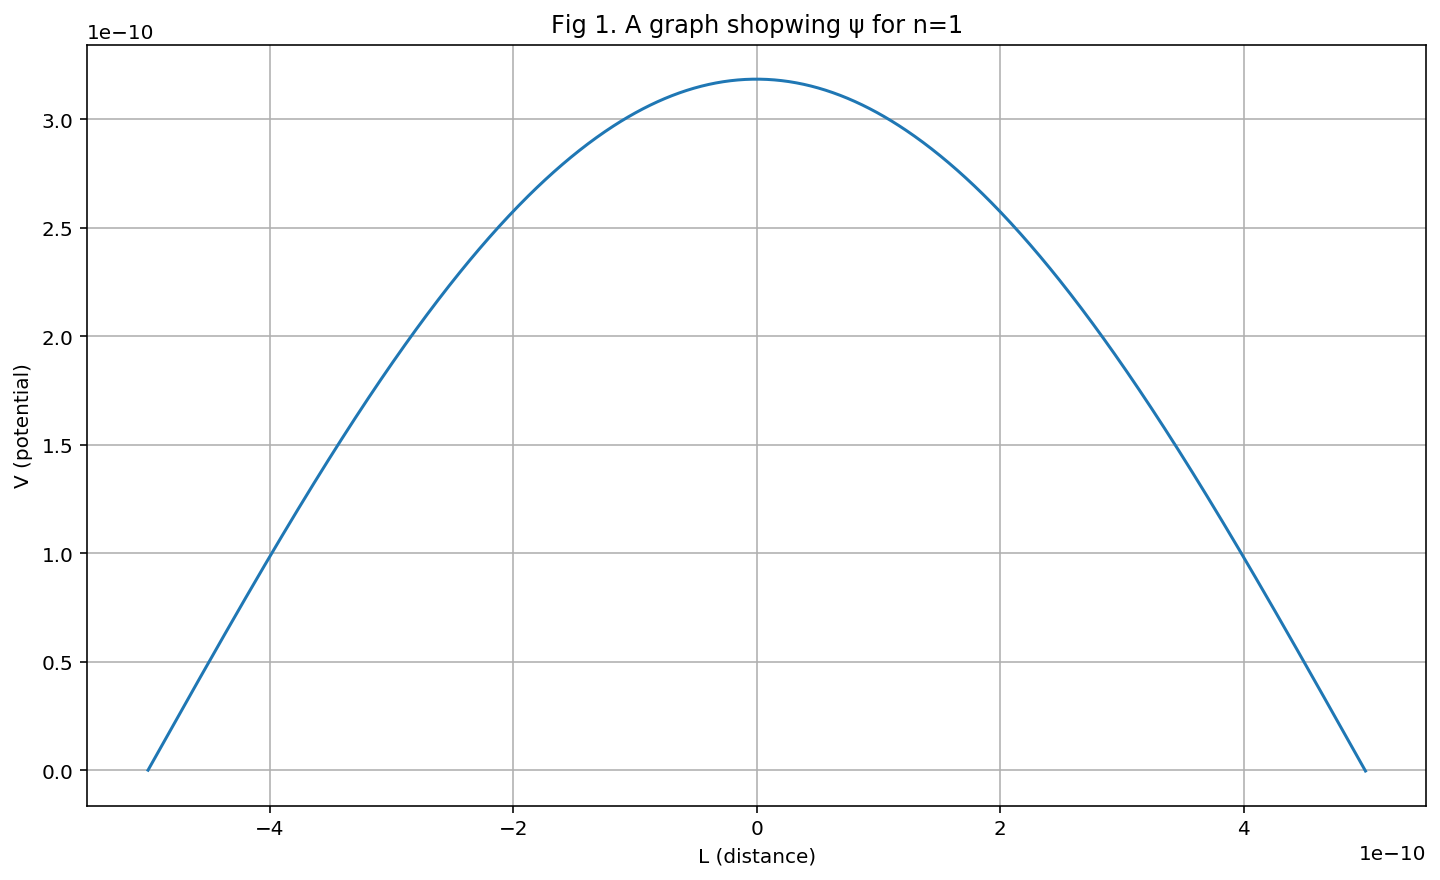

In [34]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

psi_left = 0        #boundary condtions
dpsi_dx_left = 1

solution = solve_ivp(derivative, (xmin,xmax), [psi_left,dpsi_dx_left], t_eval = x_eval, args = (En,))  #solving for the wavefunction using the x values of the legnht of the well, the boundary conditons defines and the given value of E calulcated by En
plt.plot(solution.t, solution.y[0])
plt.grid()
plt.xlabel("L (distance)")
plt.ylabel("V (potential)")
plt.title("Fig 1. A graph shopwing ψ for n=1")

As shown by fig.1 the result is what we were expecting \[1:133–189\] and therefore can now be normalized. Normalization is simply the integral of the probability density equal to 1 \[1:56\-76\]. In this report, we will be using Simpson's rule to integrate. The general rule for numerical integration is \[3\]:\begin{equation}\int_a^b f(x)\,\mathrm{d}x \approx (b-a)\sum_{i=1}^N w_if(x_i)\\\tag{4}\end{equation} Where $w_i$ are the weights at i and $x_i$ are the places to evaluate the function at point i. For Simpson's rule, the $x_i$ must be evenly spaced \(h\). The input to our python function will be a NumPy array `d` containing $f(x_i)$. With this information, we can write the integral as:\begin{equation}\int_a^b f(x)\,\mathrm{d}x \approx h\sum_{i=1}^N v_if(x_i)\\\tag{5}\end{equation}Where v is $
v = \tfrac13\times(1, 4, 2, 4, 2, \dots, 4, 2, 4, 1).
$Therefore we can now code an integration function in python using the v values as an array and equation \(5\).


In [35]:
def simpson(d,h):
    '''perfomrs simpons rule given an evenly spaced x (h), and an array d containt f(x)'''
    if (len(d) < 3) or (len(d) % 2 == 0):   #for simpsons to work properly the number of points must be odd and at least 3
        return (print("error",len(d)))
    else:
        v = 2*np.ones(len(d))
        v[1::2] = 4
        v[0]= 1
        v[-1]= 1
        v_final = (1/3)*v
        return h*sum(d*v_final)

Using the Simpsons function above we can now normalize and plot the probability density.



Normalized value for step 11: 1.0
Normalized value for step 101: 1.0
Normalized value for step 1001: 1.0
Normalized value for step 10001: 1.0
Normalized value for step 100001: 1.0


Normalized value for step 1000001: 1.0


Normalized value for step 10000001: 1.0


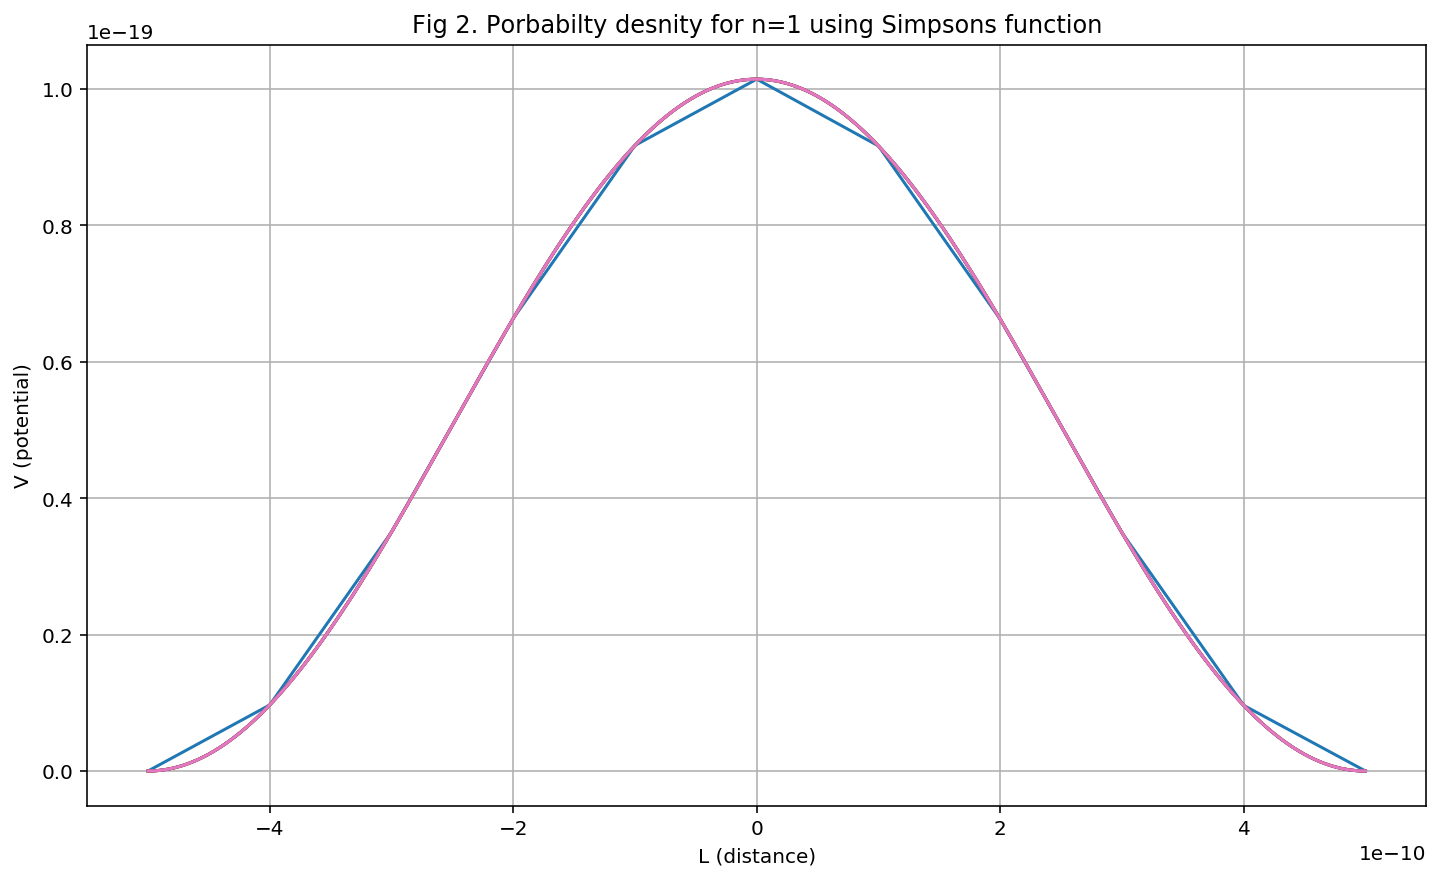

In [36]:
ns = np.logspace(1,7,7)+1     #number of steps varrying from 10 to 10^7
for n in ns:
    x = np.linspace(xmin, xmax, int(n))          #x values of the lenght of the well with the points being labled by 
    solution_norm = solve_ivp(derivative, (xmin,xmax), [psi_left,dpsi_dx_left], t_eval = x, args = (En,))
    y = solution_norm.y[0]**2       #porbabilty density (wavefunction squared)
    s = simpson(y,x[1]-x[0])        #calling the simpsons function to integrate the probabilty density
    print("Normalized value for step {}:".format(int(n)), 1-s)            #normalize condtion (expect to get 1)
    plt.plot(x,y)             #plotting the porbability density
    plt.title("Fig 2. Porbabilty desnity for n=1 using Simpsons function")
    plt.xlabel("L (distance)")
    plt.ylabel("V (potential)")
    plt.grid()

It is shown above that ψ normalizes to what we expect as well as the plot of the probabilty density in Fig 2. is what was expected. This method can also be done in a much easier way using SciPy which has an inbuilt Simpsons function. In this report, we will be using this to normalize.


Normalized value: 1.0000000000000002


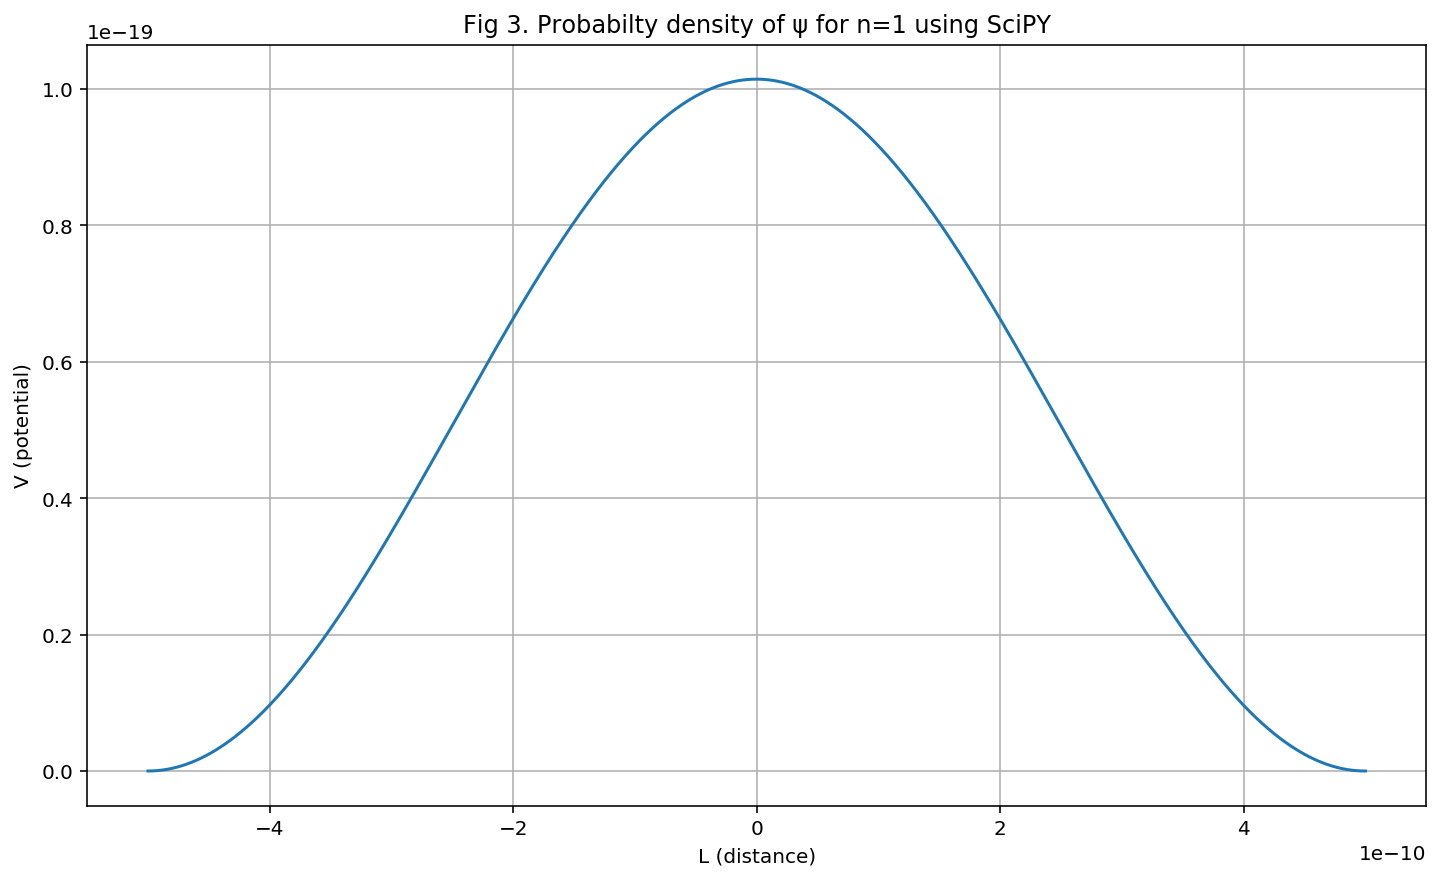

In [37]:
import scipy as sp

def normalize (psi_x,psi_y, x_values):
    '''fucntion that takes the x and y values of psi that was found above and the values of x to normalize psi and plot a graph'''
    area = sp.integrate.simpson(psi_x**2, psi_y)
    psi_norm = psi_x/np.sqrt(area)
    plt.plot(x_values, psi_x)
    plt.grid()
    plt.title("Fig 3. Probabilty density of ψ for n=1 using SciPY")
    plt.xlabel("L (distance)")
    plt.ylabel("V (potential)")
    print("Normalized value:", sp.integrate.simpson(psi_norm**2, x_eval, dx= x_eval[1] - x_eval[0]))
    
normalize(solution.y[0]**2, solution.t, x_eval)

Once again, as shown in Fig 3. the graph matches expectations and is also the same as Fig 2. The normalization value is also what is expected. All of this was done with a given energy level \(n=1\). But what about when there are no given energy levels and no equation \(3\). A graph can be made of the amplitude of the wavefunction against energy where each time the amplitude is equal to 0 the corresponding energy is an energy level. This energy can be found via root\-finding methods. Firstly, an amplitude against energy graph has to be plotted.



Text(0.5, 1.0, 'Fig 4. Amplitude against Energy of an infinite well')

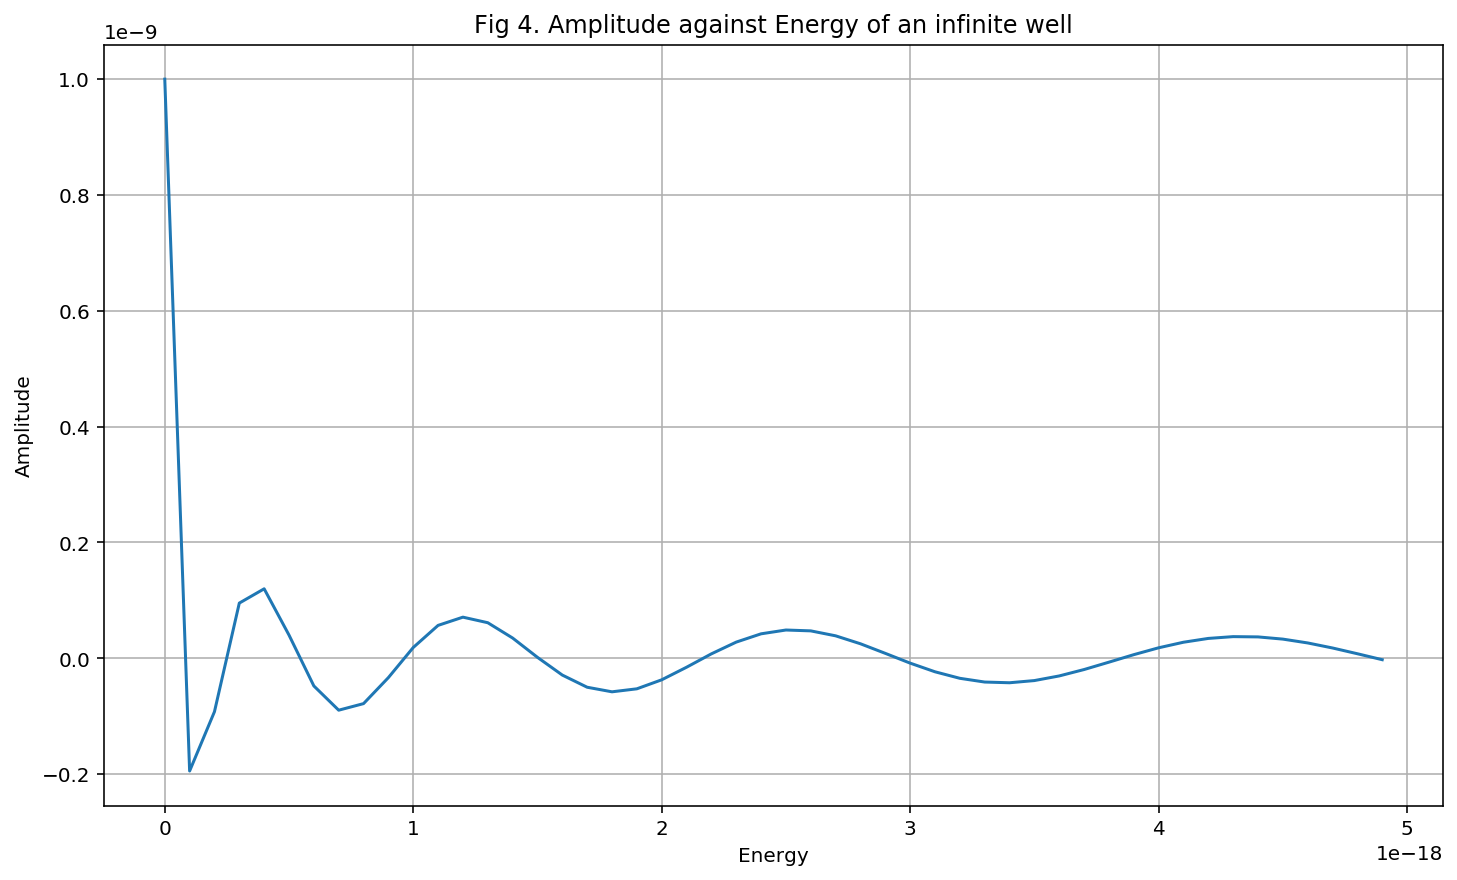

In [38]:
energy_list = []     #empty lists that will be appened using a for loop to plot the graph
amp_list = []

for n in range(50):
    En = n*(1e-19)             #putting the correct scale (n into eV)
    energy_list.append(En)     #appending the energy to a list
    sol = solve_ivp(derivative, (xmin,xmax), [psi_left,dpsi_dx_left], t_eval = x_eval, args = (En,))
    amp_list.append(sol.y[0][-1])         #taking the last values of the wavefucntion and appending to a list

plt.plot(energy_list,amp_list)
plt.grid()
plt.ylabel("Amplitude")
plt.xlabel("Energy")
plt.title("Fig 4. Amplitude against Energy of an infinite well")

Since, we are considering an infinite well and particles can not escape it each time the graph crosses the x-axis there is a zero probability of the particle escaping the well, meaning that those are the energy levels. As seen in Fig 4. for the larger values of n the graph becomes very flat thefore bisection is best for root finding. Therfore, a function is needed to return the amplitude when given an energy.


In [39]:
psi_right = 0    #boundary condtions on the right
dpsi_dx_right = 1

def energy_amplitude(E):
    '''A function that returns the amplitude given an energy using the right boundary condtions'''
    solution = solve_ivp(derivative, (xmin,xmax), [psi_right,dpsi_dx_right], t_eval = x_eval, args = (E,))
    return solution.y[0][-1]

Using the energy\_amplitude function the bisection method can be used to find the root. The way bisection works is simply by bisecting the interval of two values of opposite signs. These values are the energy\_amplitude at a given energy and in our case can be simply read from Fig 4. The function is then evaluated at the midpoint of the interval, and then the selected subinterval which the roots lie is used to repeat the initial steps until the root is found given a certain tolerance. \[4\]

This whole process can be visualised in the figure below.

 <img src=".final-project-ap20058.ipynb.upload/Screenshot 2023-01-02 at 13.32.54.png"   width="452px"  height="255px"  style="object-fit:cover"/>

Fig 5. A graph showing f\(x\) being bisected. It shows how the search area decreases each time the bisection is performed and how the midpoint, lower or upper bound becomes one of the two bounds until the root is found. \[5\]

Putting this in code:



In [40]:
def bisection_step(f, bounds):
    """Performs one step of the bisection algorithm to locate a root of f,
    and returns a smaller range in which the root is found."""

    lower, upper = bounds           # "Unpack" the tuple so that we can manipulate the lower and upper bound separately
    middle = (lower + upper) / 2    #  Calculate the midpoint
    if f(lower) * f(middle) < 0:
        return (lower, middle)
    else:
        return (middle, upper)

As stated above, Fig 4 can be used to find the lower and upper bounds. The first root will be found which should correspond to the energy level n = 1.

In [41]:
print("{:^20}  {:^25}  {:^20}  {:^14}".format("lower", "upper", "difference", "Iterations"))

l, u = 0.01e-18,0.1e-18  #upper and lower bound found from Fig. 4
iterations = 0
while u - l > 1e-22 or iterations == 35:     #tollerance of the bisection (so it knows when to stop)
    l, u = bisection_step(energy_amplitude, (l, u))   #calling the bisection_step function with the function energy_amplitude and the bounds
    iterations = iterations + 1
    print("{:15.20f}  {:15.20f}  {:15.22f}  {:}".format(l, u, u-l, iterations))


       lower                    upper                 difference         Iterations  
0.00000000000000000005  0.00000000000000000010  0.0000000000000000000450  1
0.00000000000000000005  0.00000000000000000008  0.0000000000000000000225  2
0.00000000000000000005  0.00000000000000000007  0.0000000000000000000113  3
0.00000000000000000005  0.00000000000000000006  0.0000000000000000000056  4
0.00000000000000000006  0.00000000000000000006  0.0000000000000000000028  5
0.00000000000000000006  0.00000000000000000006  0.0000000000000000000014  6
0.00000000000000000006  0.00000000000000000006  0.0000000000000000000007  7
0.00000000000000000006  0.00000000000000000006  0.0000000000000000000004  8
0.00000000000000000006  0.00000000000000000006  0.0000000000000000000002  9
0.00000000000000000006  0.00000000000000000006  0.0000000000000000000001  10


To check that this is correct, the root \(the lower or upper bound in this case\) can be used as the energy argument in the derivative function which then can be used by solve\_ivp to solve the now first\-order ODE and plot a graph. This graph should look exactly like Fig 1. Furthermore, by rearranging equation\(3\) for n the energy value can be plugged in and a solution for the energy level can be found.


Energy level(n) = 1


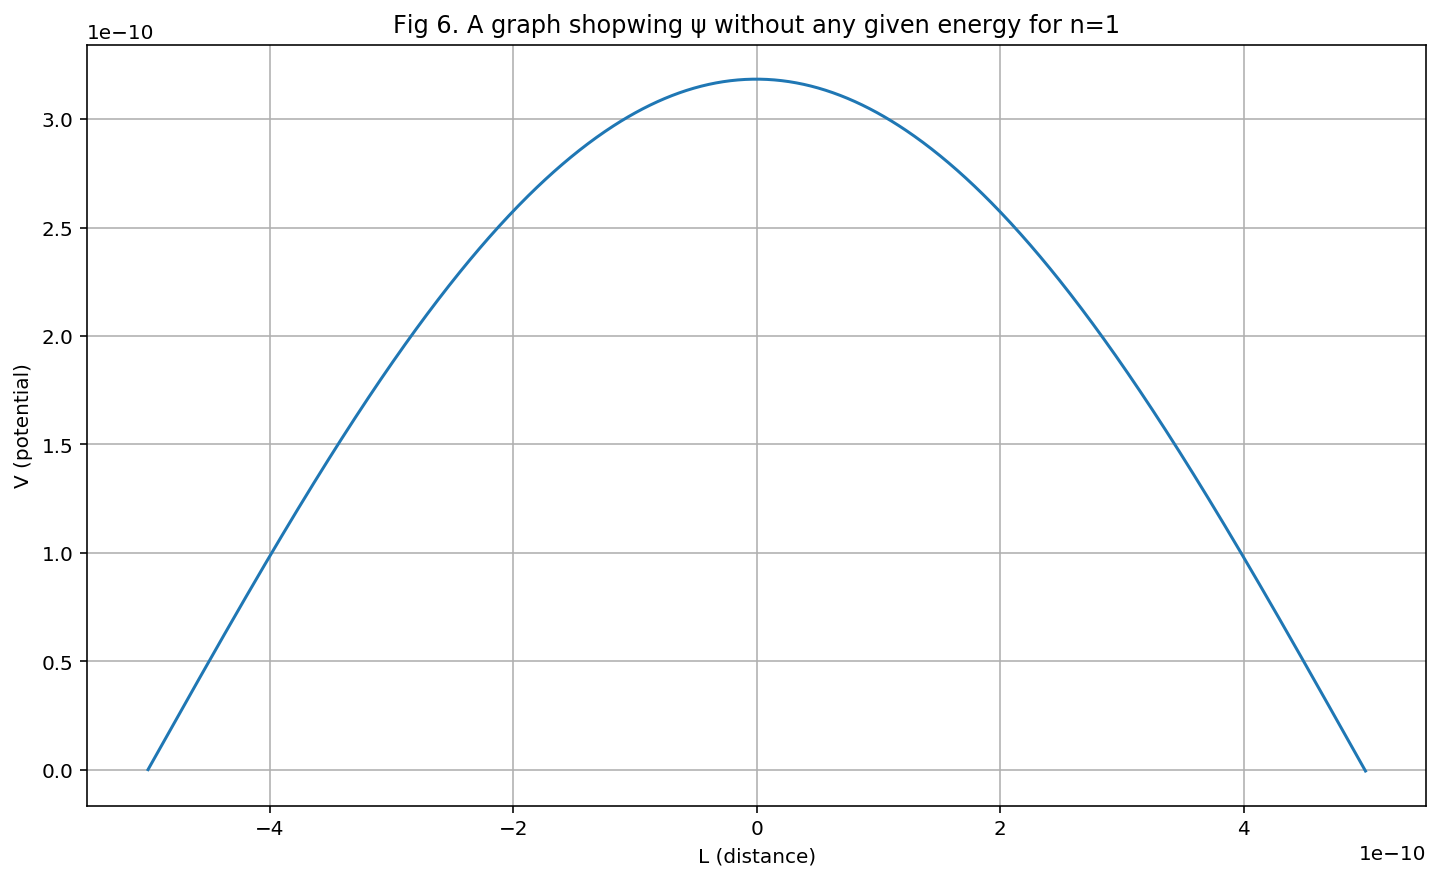

In [42]:
solution_noEn = solve_ivp(derivative, (xmin,xmax), [psi_left,dpsi_dx_left], t_eval = x_eval, args = (u,))  #using solve_ivp with the derivative function with argument u (the upper bound)
plt.plot(solution_noEn.t, solution_noEn.y[0])  
plt.grid()
plt.xlabel("L (distance)")
plt.ylabel("V (potential)")
plt.title("Fig 6. A graph shopwing ψ without any given energy for n=1")
n = np.sqrt((u * m * (L**2)) / ((np.pi**2) * (hbar**2)))   #confirming that the energy level is 1
print("Energy level(n) =", round(n))

As shown Fig 1. and Fig 6. are identical therefore validating that the code so far is working as expected. The code above can be rewritten in a function which does the bisection loop and then uses solve\_ivp to be able to plot a graph of $\psi$ without having a given energy value. 


In [43]:
def psi_plot_noEn (l, u):
    '''a function that perfoms the bisection method multiple times and returns a graph of the wavefunction for that energy level'''
    iterations = 0
    while u - l > 1e-25 or iterations == 35:
        l, u = bisection_step(energy_amplitude, (l, u))
        iterations = iterations + 1
    n = round(np.sqrt((u* 2 * m * (L**2)) / ((np.pi**2) * (hbar**2))))  #finds the value of n using the root, by plugging it in to the rearnaged En equation
    solution_En = solve_ivp(derivative, (xmin,xmax), [psi_left,dpsi_dx_left], t_eval = x_eval, args = (u,))
    plt.title("Fig 7.  ψ for different energy levles without a given energy value")
    plt.plot(solution_En.t, solution_En.y[0], label = "n={}".format(n))
    plt.xlabel("L (distance)")
    plt.ylabel("V (potential)")

By using the values on Fig 4. and calling the psi_plot_noEn function the following graph can be obtained.



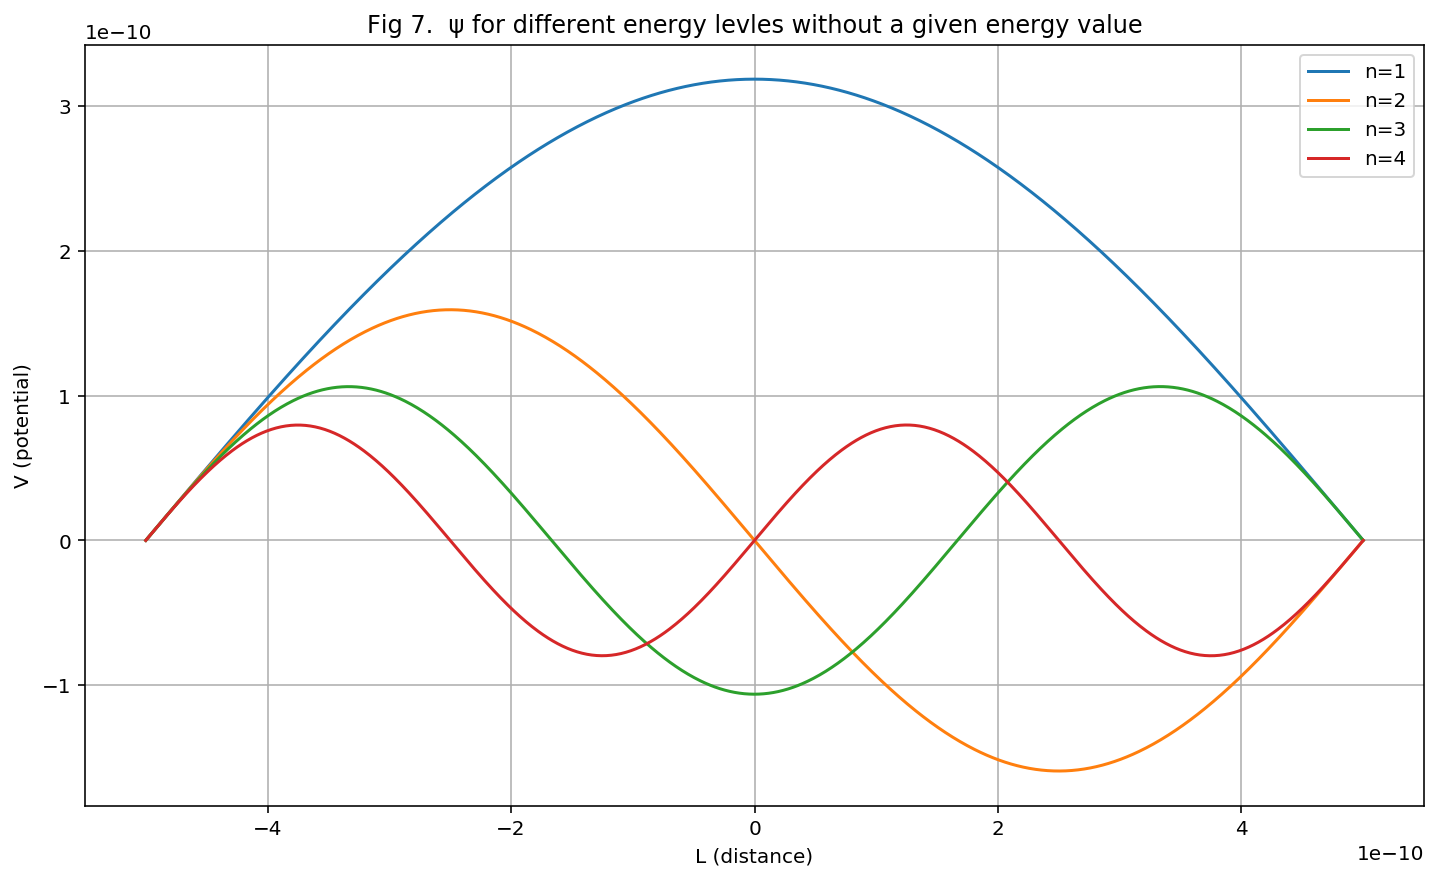

In [44]:
psi_plot_noEn (0.01e-18,0.1e-18)
psi_plot_noEn (0.1e-18,0.4e-18)
psi_plot_noEn (0.5e-18,0.8e-18)
psi_plot_noEn (0.8e-18,1.1e-18)
plt.grid()
plt.legend()

Fig 7. looks correct since for n=1, we expect an even parity function \(cos\) and n=1 shows that. Whilst n=2 we expect an odd parity function and n=2 shows that, and so on. This happens only when the potential is symmetric, which in our case it is  \[1: 133\-189\]. The same process can be repeated for finding the probability density graphs. By first creating another function that does the bisection step which in turn uses the root to use solve \_ivp to be able to find $\psi$
which in turn is squared to get the probability density which is plotted.



In [45]:
def probdensity_plot (l,u):
    ''''a function that perfoms the bisection method multiple times and returns a graph of the probabilty density for that energy level'''
    iterations = 0
    while u - l > 1e-25 or iterations == 35:
        l, u = bisection_step(energy_amplitude, (l, u))
        iterations = iterations + 1
    n = round(np.sqrt((u* 2 * m * (L**2)) / ((np.pi**2) * (hbar**2))))  #finds the value of n using the root and the rearanged En equation
    solution_En = solve_ivp(derivative, (xmin,xmax), [psi_left,dpsi_dx_left], t_eval = x_eval, args = (u,))
    plt.plot(x_eval, abs(solution_En.y[0]**2),label = "n={}".format(n))    #plots the probabilty density
    plt.grid()
    plt.title("Fig 8. Probabilty density of ψ using SciPY")
    plt.xlabel("L (distance)")
    plt.ylabel("V (potential)")

Once again using the same numbers which were found from Fig 4.


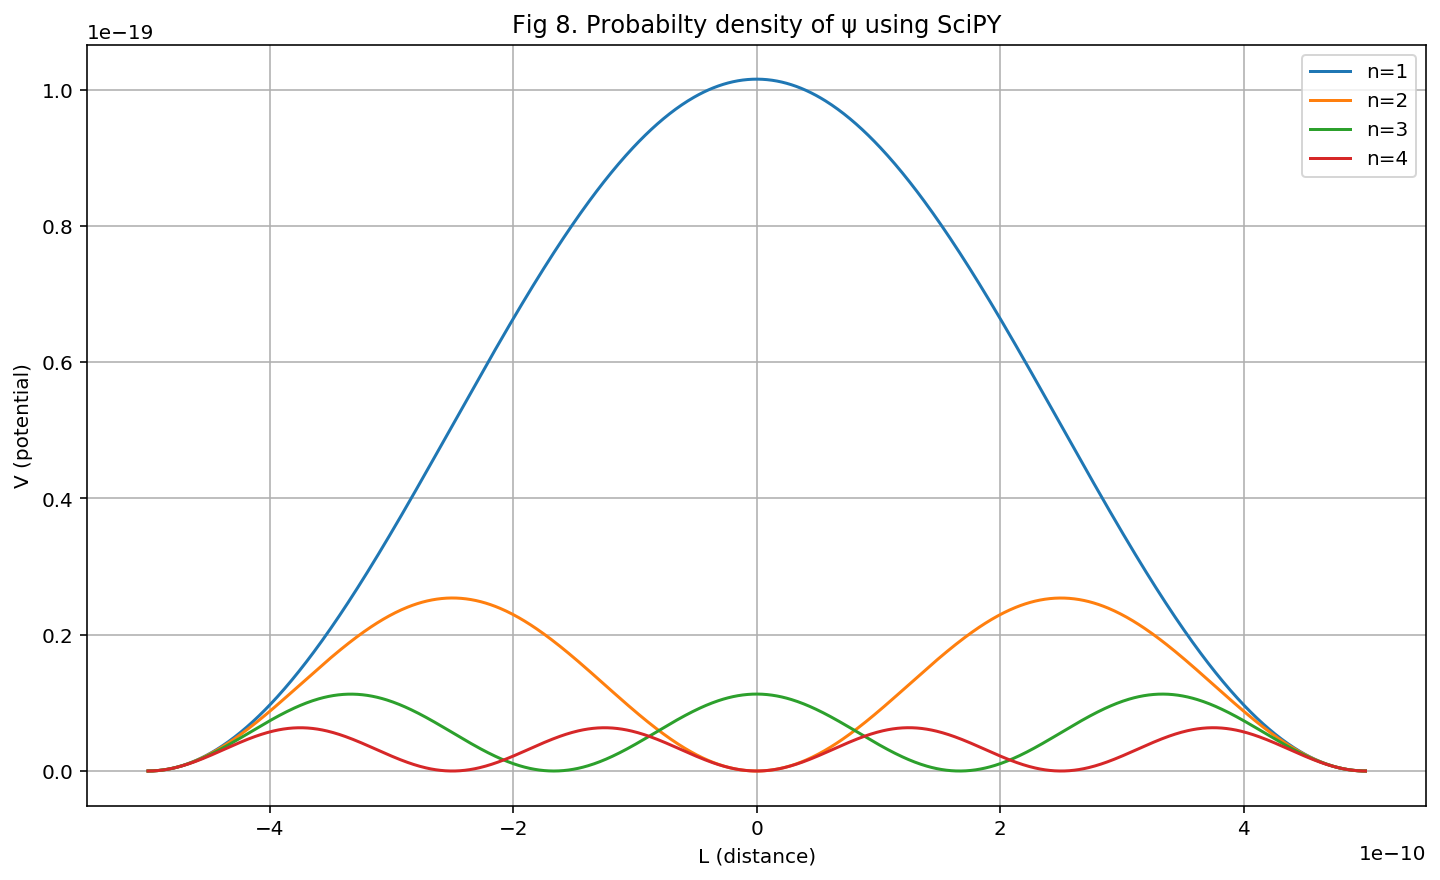

In [46]:
probdensity_plot (0.01e-18,0.1e-18)
probdensity_plot (0.1e-18,0.4e-18)
probdensity_plot (0.5e-18,0.8e-18)
probdensity_plot (0.8e-18,1.1e-18)
plt.grid()
plt.legend()

Once again this is what was expected from Fig 8. Therefore we can adapt all this code for an infinite well with something inside it. This report will deal with a bump. Firstly, the infinite well with the bump needs to be defined. 


In [47]:
L = 1e-9         #total lenght of well
xmin = -L/2
xmax = L/2       #centering well at x = 0
xmin_well = -L/8
xmax_well = L/8         #size of bump once again centered at x = 0
npts = 1000
first_well = np.linspace(xmin,xmin_well,npts)     #size of first well(well on the left side of bump)
first_well_V = 0                                  #potential of first well
bump =  np.linspace(xmin_well,xmax_well, npts)    #size of bump
bump_V = 3e-19                                    #potential of bump
second_well = np.linspace(xmax_well,xmax, npts)   #size of second well (well on the right side of bump)
second_Well_V = 0                                 #potential of second well
#all of the condtions above desrcibe an infinite well with a bump in the middle (centered at x=0)


This means that instead of having the potential be 0 all the time there will be an increase of V inside the well. This requires changing the initial derivative function to allow the use of different V values instead of having V=0 as an argument. 



In [48]:
def derivative_with_potential(x, sv, E, V):
    '''turns a second order ODE of the schordinger equation with a given E and V value into a first order ODE'''
    psi, dpsi_dx = sv
    d2psi_dx2 = (-k*psi*(E-V))
    return dpsi_dx, d2psi_dx2

The difference from the code written above is that there will be more boundary conditions. The initial and final boundary conditions are the same as it is still the infinite square well as described above but then there is the complication of the bump. It makes that the initial boundary conditions of the bump are given by the final values of the wavefunction calculated using solve\_ivp of the first well. In turn, the last value of the wave function for the bump will be the boundary condition for the second well.  Each solve\_ivp will use the derivative\_with\_potential function and will need to be given the corresponding x values which are defined by the well as well as the E \(energy\) V\(potential\) values.


(0, 1.2e-18)

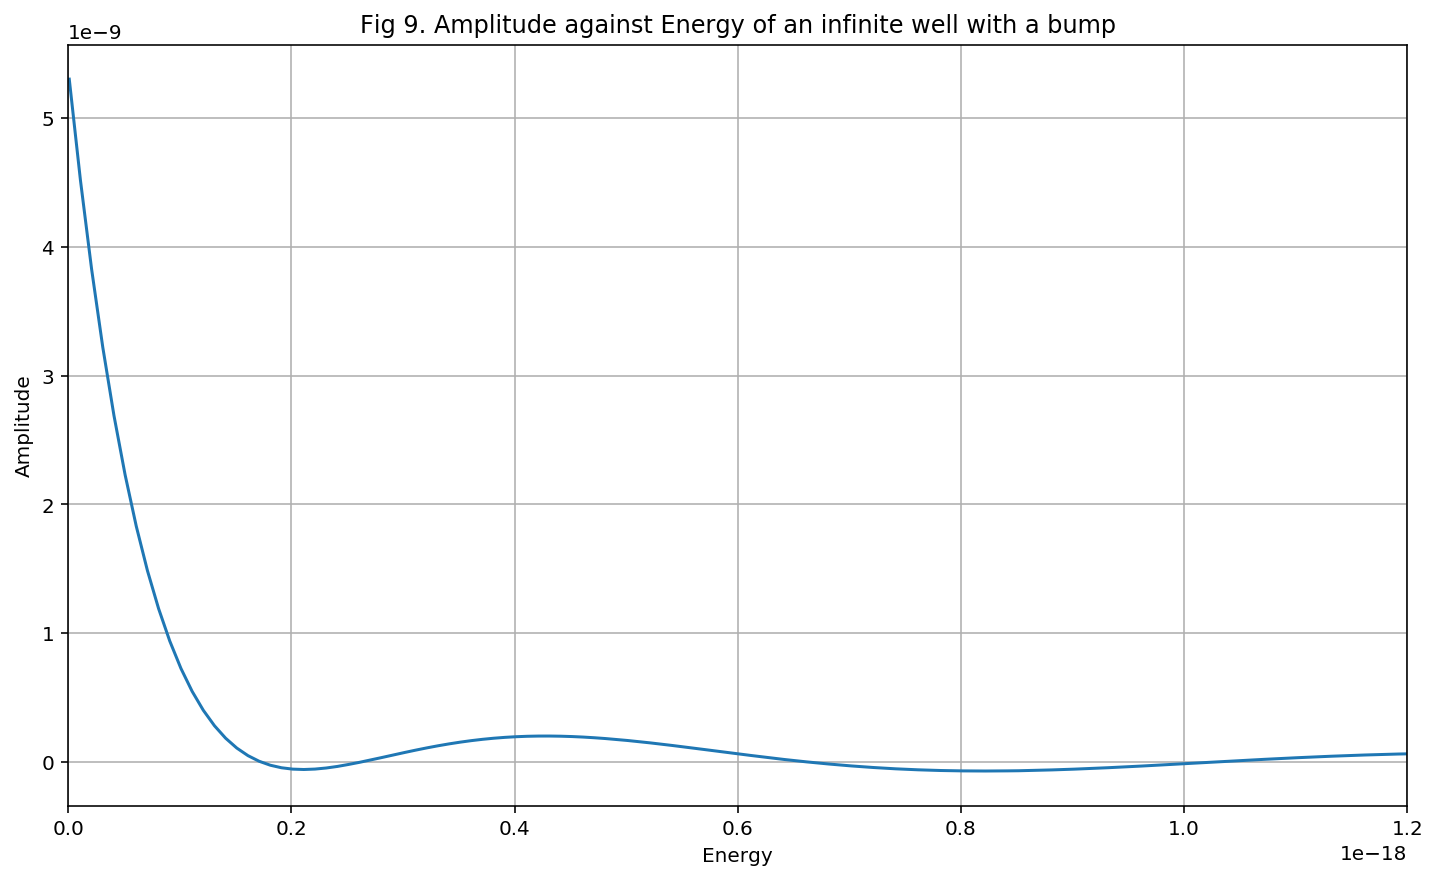

In [49]:
energy_values = np.linspace(0.01,100,npts)  #will be used for the for loop below
psi_left = 0
dpsi_dx_left = 1       #boundary contions on the left side

energy_list_bump = []     #empty lists that will be appended to plot a graph
amp_list_bump = []
for e in energy_values:
    En = e*(1e-19)               #putting the correct scale (converting using eV)
    energy_list_bump.append(En)
    sol_first_well = solve_ivp(derivative_with_potential, (xmin,xmin_well), [psi_left,dpsi_dx_left], t_eval = first_well, args = (En,first_well_V))      #solves for the wavefunction in the first well
    sol_bump_well = solve_ivp(derivative_with_potential, (xmin_well,xmax_well), [sol_first_well.y[0][-1],sol_first_well.y[1][-1]], t_eval = bump, args = (En,bump_V))            #solves for the wavefunction in the bump with the boundary condtions aquired from the solve_ivp of the first well
    sol_second_well = solve_ivp(derivative_with_potential, (xmax_well,xmax), [sol_bump_well.y[0][-1],sol_bump_well.y[1][-1]], t_eval = second_well, args = (En,first_well_V))       #solves for the wavefunction in the second well with the boundary condtions aquired from the solve_ivp of the second well
    amp_list_bump.append(sol_second_well.y[0][-1])      #appending the amplitude graph using the last value of the wavefunction for multiple values of energy from the energy_value linspace

plt.plot(energy_list_bump,amp_list_bump)
plt.grid()
plt.ylabel("Amplitude")
plt.xlabel("Energy")
plt.title("Fig 9. Amplitude against Energy of an infinite well with a bump")
plt.xlim(0,0.12e-17)

Since the right boundary conditions are the same, as the well is still infinite. A function similar to energy\_amplitude can be written with this time instead using solve\_ivp three times for the different boundary conditions as done above. 


In [50]:
psi_right = 0   #still the same right boundary contdtions since the well is still an infinite well
dpsi_dx_right = 1

def energy_amplitude_bump(E):
    '''A function that returns the amplitude given an energy using the right boundary condtions of the infinite well with a bump'''
    sol_first_well = solve_ivp(derivative_with_potential, (xmin,xmin_well), [psi_right,dpsi_dx_right], t_eval = first_well, args = (E,first_well_V))   #solves the wavefcuntion of the first well
    sol_bump_well = solve_ivp(derivative_with_potential, (xmin_well,xmax_well), [sol_first_well.y[0][-1],sol_first_well.y[1][-1]], t_eval = bump, args = (E,bump_V)) #solves wavefunction for the bump
    sol_second_well = solve_ivp(derivative_with_potential, (xmax_well,xmax), [sol_bump_well.y[0][-1],sol_bump_well.y[1][-1]], t_eval = second_well, args = (E,first_well_V))  #sovles wavefunction for the secdond well
    return sol_second_well.y[0][-1]  #returns the amplitude of a selected E value

Finally using the function above and the bisection\_step function to root find the graphs of $\psi$ and $\psi^2$ can be plotted for an infinite well with a bump.



In [51]:
def psi_bump (l, u):
    iterations = 0
    while u - l > 1e-25 or iterations == 35:
        l, u = bisection_step(energy_amplitude_bump, (l, u))
        iterations = iterations + 1
    sol_first_well = solve_ivp(derivative_with_potential, (xmin,xmin_well), [psi_right,dpsi_dx_right], t_eval = first_well, args = (u,first_well_V))
    sol_bump_well = solve_ivp(derivative_with_potential, (xmin_well,xmax_well), [sol_first_well.y[0][-1],sol_first_well.y[1][-1]], t_eval = bump, args = (u,bump_V))
    sol_second_well = solve_ivp(derivative_with_potential, (xmax_well,xmax), [sol_bump_well.y[0][-1],sol_bump_well.y[1][-1]], t_eval = second_well, args = (u,first_well_V))
    plt.subplot(1,2,1)
    n = np.sqrt((u* 2 * m * (L**2)) / ((np.pi**2) * (hbar**2)))
    print(" n = {:.3f}".format(n))
    plt.title("ψ for an infinite well with a bump")
    plt.plot(sol_first_well.t,sol_first_well.y[0], color = "blue")
    plt.plot(sol_bump_well.t,sol_bump_well.y[0], color = "blue")
    plt.plot(sol_second_well.t, sol_second_well.y[0], color = "blue")
    plt.xlabel("L (distance)")
    plt.ylabel("V (potential)")
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("ψ^2 for an infinite well with a bump")
    plt.plot(sol_first_well.t,sol_first_well.y[0]**2, color = "red")
    plt.plot(sol_bump_well.t,sol_bump_well.y[0]**2, color = "red")
    plt.plot(sol_second_well.t, sol_second_well.y[0]**2, color = "red")
    plt.xlabel("L (distance)")
    plt.ylabel("V (potential)")
    plt.grid()

### _Results:_



Firstly, let's consider the well\-defined in the method section. By reading off the values from Fig 9. and calling the psi\_bump function, the first energy level can be found.


Fig 10. Two graphs showcsaing the wave function and the porbabilty density for n=1
 n = 1.689


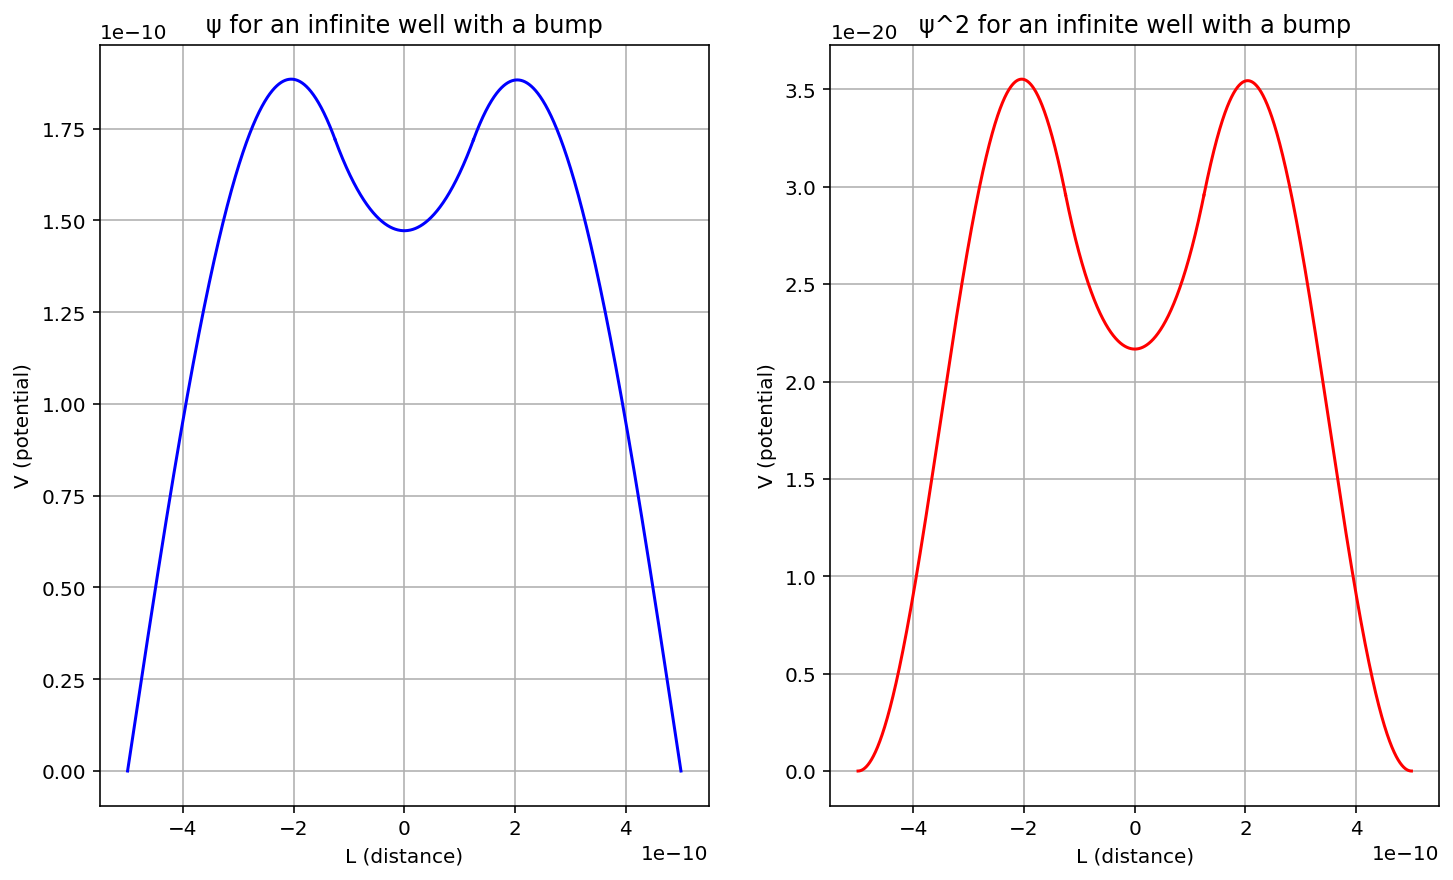

In [52]:
print("Fig 10. Two graphs showcsaing the wave function and the porbabilty density for n=1")
psi_bump (0,0.02e-17)

Fig 10. shows how at the first energy level n=1 the wavefunction is affected by the bump. This is shown by the dip around where L = 0, which is where the bump is situated. Secondly, the psi\_bump function can be called again with values for the second energy level.



Fig 11. Two graphs showcsaing the wave function and the porbabilty density for n=2
 n = 2.094


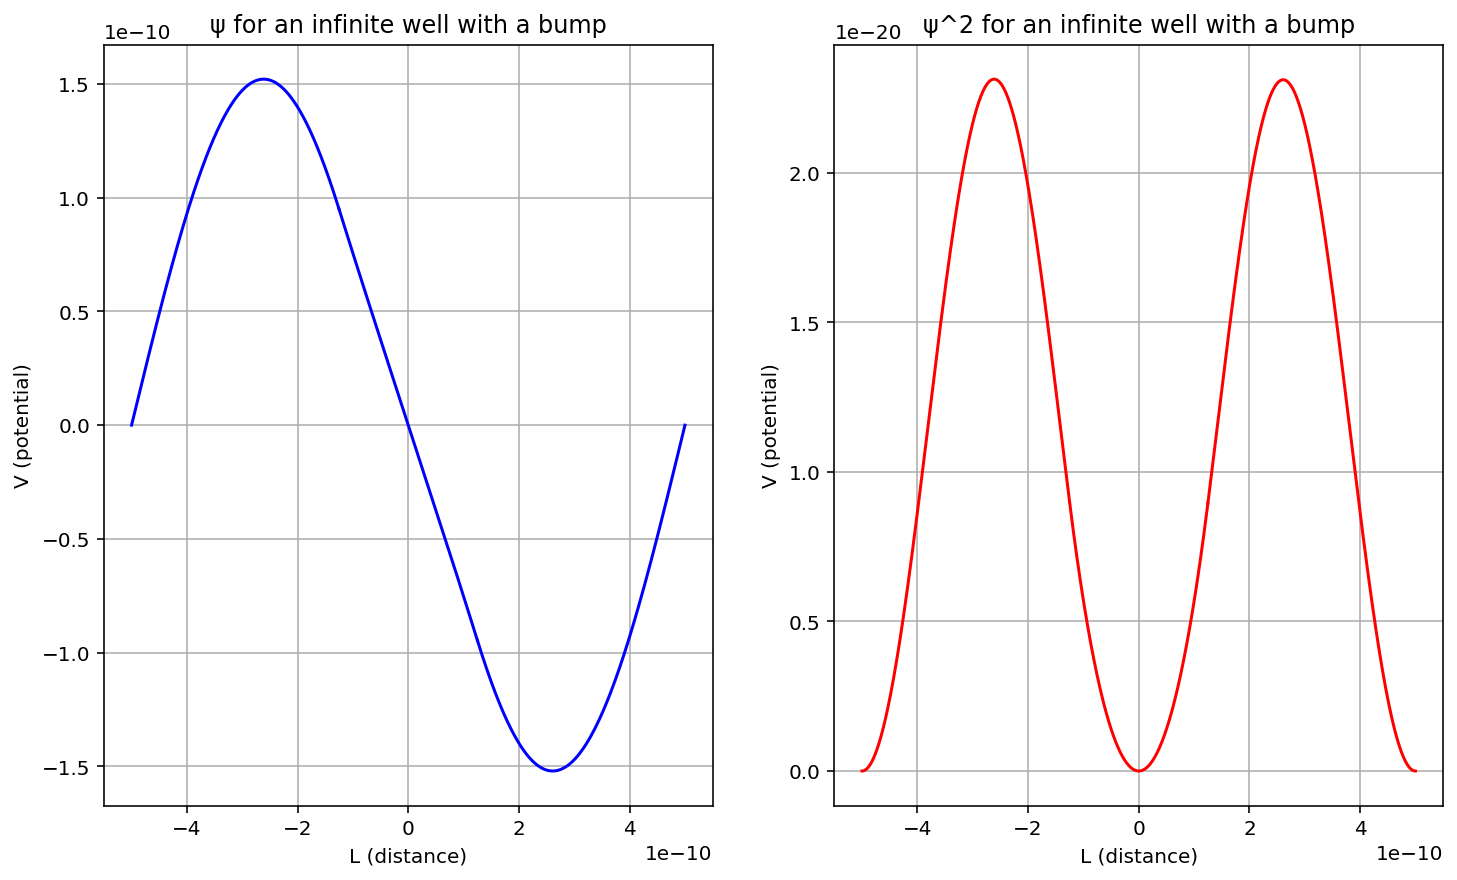

In [53]:
print("Fig 11. Two graphs showcsaing the wave function and the porbabilty density for n=2")
psi_bump (0.02e-17,0.03e-17)

For Fig 11. the wavefunction is very slightly affected by the bump as there is a slight kink at L = 0. This means that for n=3 it should be expected to look like Fig 7. Thirdly, the same code can be repeated for n =3. 



Fig 12. Two graphs showcsaing the wave function and the porbabilty density for n=3


 n = 3.309


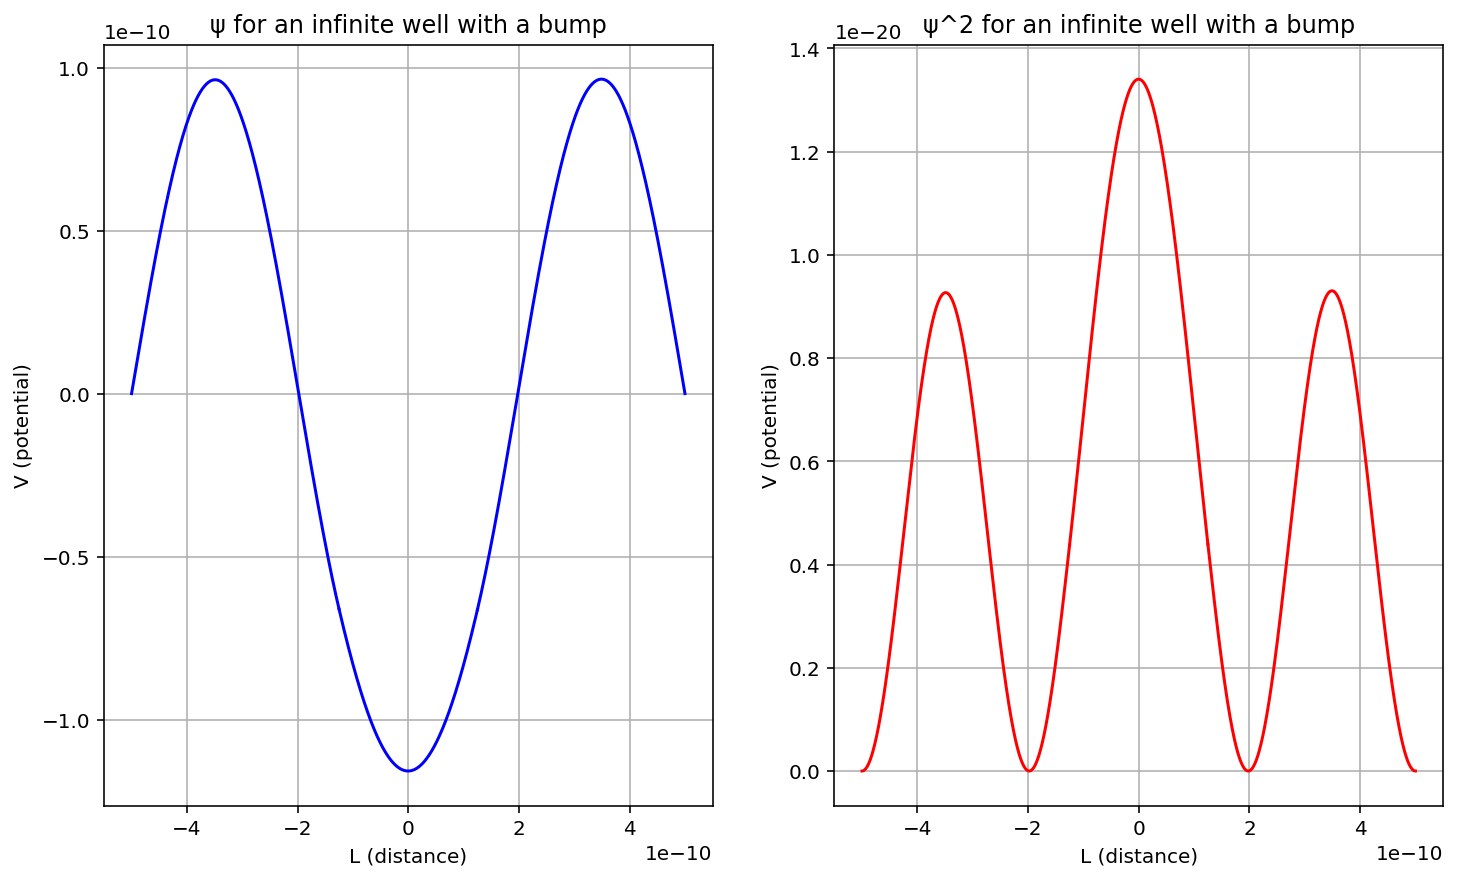

In [54]:
print("Fig 12. Two graphs showcsaing the wave function and the porbabilty density for n=3")
psi_bump (0.06e-17,0.08e-17)

As expected Fig 12. looks like Fig 7. Finally for n=4  no change is also expected.


In [0]:
print("Fig 13. Two graphs show casing the wave function and the porbabilty density for n=4")
psi_bump (0.07e-17,0.15e-17)

### _Discussion:_

What this report set out to do was plot the wavefunction and probability densities of a particle inside an infinite square well with a bump. From the graphs plotted in the results section, it is shown that this was achieved. It was noted that the energy levels did not always match what was expected as they were not always close to the integer value of n as shown in table 1, this may be fixed using perturbation theory. TISE is, in fact, impossible to solve in general, most differential equations don't have known exact solutions, using perturbation theory we can get an approximation of the solution \[1:375\-427\].

| Energy Level (n) | 1 | 2 | 3 | 4 |
| :-- | :-- | :-- | :-- | :--|
| Calculated n | 1.689 | 2.094 | 3.309 | 4.142 |

_**Table1: A table showing the expected integer values of n against what was calculated**_

Doing perturbation theory would be a great way of improving this report and will give more accurate values of n. The results show how the wave function of the first 4 energy levels is affected by the bump. Only the first energy level is really affected since the potential is small. So what would happen to the other energy levels if the potential is increased, meaning that the bump increases in height? or the well is made wider or off\-centered? Let's try for a well with a bigger bump meaning of the bump the potential needs to be increased.



In [0]:
bump_V = 6e-19      #increased from 3e-19


After the potential is increased another energy amplitude graph needs to be plotted with the new bump\_V value.



In [0]:
energy_increase = []
amp_increase = []
for e in energy_values:
    En = e*(1e-19)               #putting the correct scale (converting using eV)
    energy_increase.append(En)
    sol_first_well = solve_ivp(derivative_with_potential, (xmin,xmin_well), [psi_left,dpsi_dx_left], t_eval = first_well, args = (En,first_well_V))      #solves for the wavefunction in the first well
    sol_bump_well = solve_ivp(derivative_with_potential, (xmin_well,xmax_well), [sol_first_well.y[0][-1],sol_first_well.y[1][-1]], t_eval = bump, args = (En,bump_V))            #solves for the wavefunction in the bump with the boundary condtions aquired from the solve_ivp of the first well
    sol_second_well = solve_ivp(derivative_with_potential, (xmax_well,xmax), [sol_bump_well.y[0][-1],sol_bump_well.y[1][-1]], t_eval = second_well, args = (En,first_well_V))       #solves for the wavefunction in the second well with the boundary condtions aquired from the solve_ivp of the second well
    amp_increase.append(sol_second_well.y[0][-1])      #appending the amplitude graph using the last value of the wavefunction for multiple values of energy from the energy_value linspace

plt.plot(energy_increase,amp_increase)
plt.grid()
plt.ylabel("Amplitude")
plt.xlabel("Energy")
plt.title("Fig 14. Amplitude against Energy of an infinite well with a bump of increased potential")
plt.xlim(0,1e-18)

Calling the psi\_bump function. The n=1 state should have a bigger dip as the potential is affecting it more compared to last time in Fig 10.



In [0]:
print("Fig 15. Two graphs show casing the wave function and the porbabilty density for n=1 for a bigger potential")
psi_bump (2.00e-19,2.5e-19)

Compared to before the wavefunction dips a lot more, as expected as the potential is bigger and thus affects it more. This means that for the n=2 state, the wavefunction should have a bigger kink.



In [0]:
print("Fig 16. Two graphs show casing the wave function and the porbabilty density for n=2 for a bigger potential")
psi_bump (2.5e-19,3e-19)

Since n=2 is affected as shown in Fig 16. it might be the bump is big enough to also affect n=3.



In [0]:
print("Fig 17. Two graphs show casing the wave function and the porbabilty density for n=3 for a bigger potential")
psi_bump (0.7e-18,0.9e-18)

From Fig 17. it is hard to tell if the bump is affecting it therefore we can conclude that this bump will not affect the 4th energy level. Overall this shows how increasing the potential affects the ground state more as well as starting to affect the other levels. There will come a point when the potential of the bump gets too big where this code breaks down as there will be phenomena such as tunneling that take place where the boundary conditions change and are no longer at the defined places. 



### _Conclusion:_

It was shown in the discussion that the goal of plotting the wave function and probability density of an infinite well with a bump was achieved. The limitation of this method is that the values of n are not accurate this is since most differential equations don't have known exact solutions. This means that perturbation theory would have to be used to achieve a more accurate result for n. Another limitation is that when the potential gets too big tunneling takes place changing the boundary conditions \[1: 133\-189\] and adding another level of complication to the code. Improving the code to includ tunneling means that it could then be applied to more complex systems and more realistic scenario. For example by removing the infinite well and placing the box in a finite potential.

In conclusion, the wave function and probability density of an infinite square well with a bump in the middle can be plotted without any given energy values. 



### _References:_

\[1\] Bransden, B.H. and Joachain, C.J. \(2000\) “Quantum Mechanics,” in Quantum Mechanics. 2nd edn. New Delhi: Pearson, pp. 51–76, 81\-128, 133\-189, 375\-427.

\[2\] Schrödinger, E. \(1926\). "An Undulatory Theory of the Mechanics of Atoms and Molecules," Physical Review, 28\(6\), pp. 1049\-1070.

\[3\]Smyth, G.K. \(1997\) Numerical Integration. Available at: https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=b588b76ed6f939f90733bc4925003c6566f59760 \(Accessed: December 29, 2022\). 

\[4\] Landau, R.H., José Páez Mejía Manuel and Bordeianu, C.C. \(2015\) “7.2 Algorithm: Trial\-and\-Error Roots via Bisection,” in Computational physics: Problem solving with python. Weinheim: Wiley\-VCH, pp. 141–170. 

\[5\]Tukey, J.W. \(no date\) The bisection method, Content \- the bisection method. Available at: https://amsi.org.au/ESA\_Senior\_Years/SeniorTopic3/3j/3j\_2content\_1.html \(Accessed: January 2, 2023\). 

